In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),"apperception"))

### IMPORTS
import cv2

from world import *
from world_executor import *
from video_util import *
from metadata_util import *
import lens

import psycopg2


In /home/yongming/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/yongming/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/yongming/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/yongming/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/yongming/.local/lib/python3.6/site-packages/matplotlib/

-> Loading model from  models/mono+stereo_640x192
   Loading pretrained encoder
   Loading pretrained decoder


In [2]:
### Let's define some attribute for constructing the world first
name = 'traffic_scene' # world name
units = 'metrics'      # world units
cam1_id = 'cam1'
cam1_video_file = "../visual_road_video_cut/traffic-001_clip_clip.mp4" #cam1 view
cam2_id = 'cam2'
cam2_video_file = "../visual_road_video_cut/traffic-002_clip_clip.mp4" #cam2 view

In [3]:
### First we define a world
traffic_world = World(name=name, units=units)

### Use TASM if it's available on the machine
# traffic_world = World(name=name, units=units, enable_tasm=True)

In [4]:
### Secondly we construct the camera
cam1_len = lens.VRLens(resolution=[3840, 2160], cam_origin=(199, -239, 5.2), yaw=-52, roll=0, pitch=0, field_of_view=90)
cam2_len = lens.VRLens(resolution=[3840, 2160], cam_origin=(210, -270, 9), yaw=128, roll=0, pitch=-30, field_of_view=90)
fps = 30

In [5]:
### Ingest the camera to the world
traffic_world = traffic_world.camera(cam_id=cam1_id, 
                               video_file=cam1_video_file, 
                               metadata_identifier=name+"_"+cam1_id, 
                               lens=cam1_len)

In [6]:
### Call execute on the world to run the detection algorithm and save the real data to the database
cam1_recognized_world = traffic_world.recognize(cam1_id)


In [7]:
cam1_recognized_world.execute()

Worlds Table created successfully........
New world inserted successfully........
Camera Table created successfully........
New camera inserted successfully.........
# of tracked items: 15
car-1 saved successfully
car-2 saved successfully
person-3 saved successfully
traffic light-4 saved successfully
traffic light-5 saved successfully
person-6 saved successfully
person-7 saved successfully
person-8 saved successfully
person-10 saved successfully
car-14 saved successfully
person-18 saved successfully
car-19 saved successfully
person-28 saved successfully
car-29 saved successfully
person-31 saved successfully


Module(body=[Return(value=Compare(left=Attribute(value=Name(id='obj', ctx=Load()), attr='object_type', ctx=Load()), ops=[Eq()], comparators=[Str(s='car')]))])
Item_meta
Worlds Table created successfully........
New world inserted successfully........
Camera Table created successfully........
New camera inserted successfully.........
mergeTrajectory(Item_meta.itemId)
atPeriodSet(mergeTrajectory(Item_meta.itemId),'{[0001-01-01 00:00:00, 9999-12-31 23:59:59.999999)}')
asMFJSON(atPeriodSet(mergeTrajectory(Item_meta.itemId),'{[0001-01-01 00:00:00, 9999-12-31 23:59:59.999999)}'))::json->'coordinates'
SELECT asMFJSON(atPeriodSet(mergeTrajectory(Item_meta.itemId),'{[0001-01-01 00:00:00, 9999-12-31 23:59:59.999999)}'))::json->'coordinates' From Item_meta  Where Item_meta.objectType='car';

SELECT asMFJSON(atPeriodSet(mergeTrajectory(Item_meta.itemId),'{[0001-01-01 00:00:00, 9999-12-31 23:59:59.999999)}'))::json->'coordinates' From Item_meta  Where Item_meta.objectType='car';


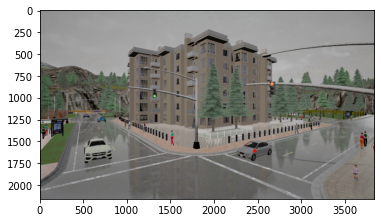

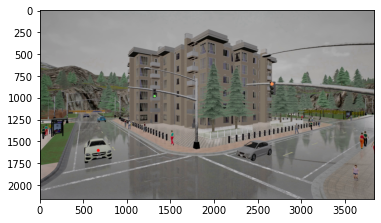

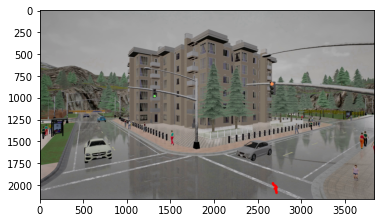

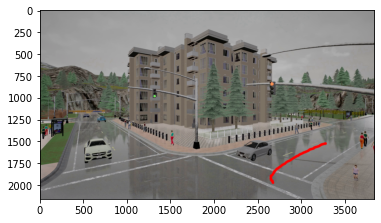

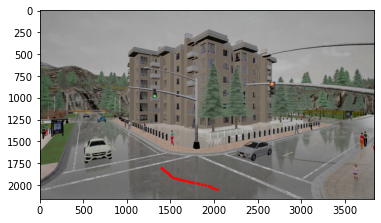

In [7]:
returned_trajectory_1 = traffic_world.predicate(lambda obj: obj.object_type == 'car').get_merged_trajectory().execute()
traffic_world.overlay_trajectory(cam1_id, returned_trajectory_1)

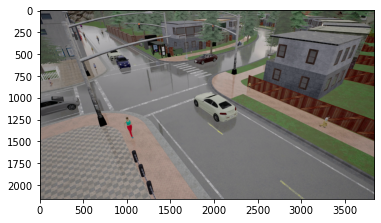

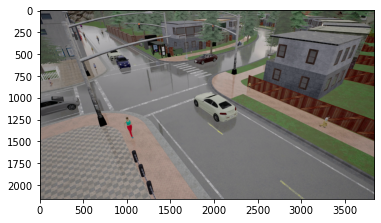

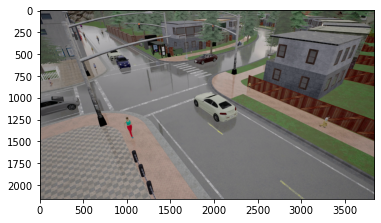

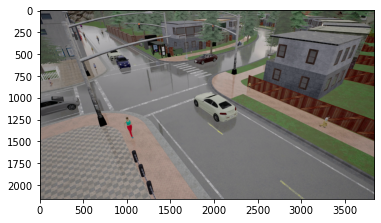

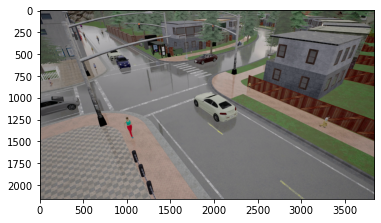

In [18]:
traffic_world.overlay_trajectory(cam2_id, returned_trajectory_1)

In [8]:
traffic_world = traffic_world.camera(cam_id=cam2_id, 
                               video_file=cam2_video_file, 
                               metadata_identifier=name+"_"+cam2_id, 
                               lens=cam2_len)



In [9]:
cam2_recognized_world = traffic_world.recognize(cam2_id)


In [10]:
cam2_recognized_world.execute()

Worlds Table created successfully........
New world inserted successfully........
Camera Table created successfully........
New camera inserted successfully.........
Camera Table created successfully........
New camera inserted successfully.........
# of tracked items: 9
car-1 saved successfully
car-2 saved successfully
person-3 saved successfully
traffic light-4 saved successfully
car-5 saved successfully
car-6 saved successfully
person-8 saved successfully
car-10 saved successfully
person-11 saved successfully


In [15]:
returned_trajectory = traffic_world.predicate(lambda obj: obj.object_type == 'car').get_merged_trajectory().execute()
len(returned_trajectory)

Module(body=[Return(value=Compare(left=Attribute(value=Name(id='obj', ctx=Load()), attr='object_type', ctx=Load()), ops=[Eq()], comparators=[Str(s='car')]))])
Item_meta
Worlds Table created successfully........
New world inserted successfully........
Camera Table created successfully........
New camera inserted successfully.........
Camera Table created successfully........
New camera inserted successfully.........
mergeTrajectory(Item_meta.itemId)
atPeriodSet(mergeTrajectory(Item_meta.itemId),'{[0001-01-01 00:00:00, 9999-12-31 23:59:59.999999)}')
asMFJSON(atPeriodSet(mergeTrajectory(Item_meta.itemId),'{[0001-01-01 00:00:00, 9999-12-31 23:59:59.999999)}'))::json->'coordinates'
SELECT asMFJSON(atPeriodSet(mergeTrajectory(Item_meta.itemId),'{[0001-01-01 00:00:00, 9999-12-31 23:59:59.999999)}'))::json->'coordinates' From Item_meta  Where Item_meta.objectType='car';

SELECT asMFJSON(atPeriodSet(mergeTrajectory(Item_meta.itemId),'{[0001-01-01 00:00:00, 9999-12-31 23:59:59.999999)}'))::json-

9

In [12]:
merged_bbox = traffic_world.get_merged_geo(distinct=True).execute()

Item_meta
Worlds Table created successfully........
New world inserted successfully........
Camera Table created successfully........
New camera inserted successfully.........
Camera Table created successfully........
New camera inserted successfully.........
mergeGeo(Item_meta.itemId)
SELECT distinct on(itemId) mergeGeo(Item_meta.itemId) From Item_meta ;

SELECT distinct on(itemId) mergeGeo(Item_meta.itemId) From Item_meta ;


In [13]:
len(merged_bbox)

19

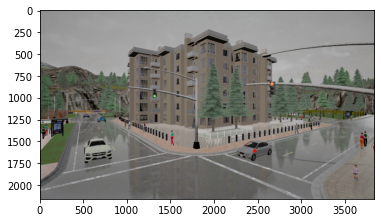

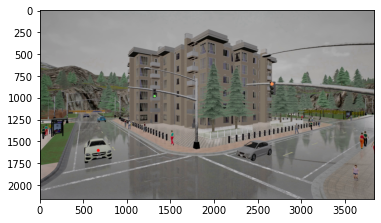

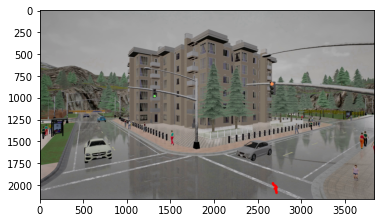

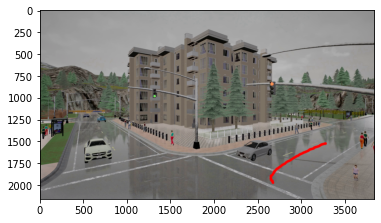

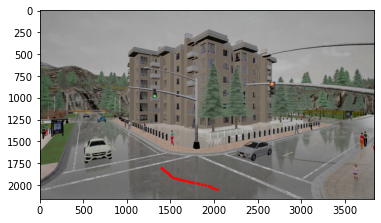

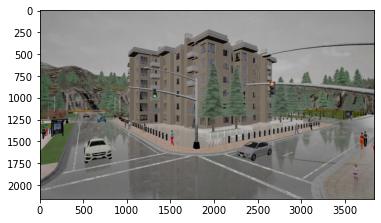

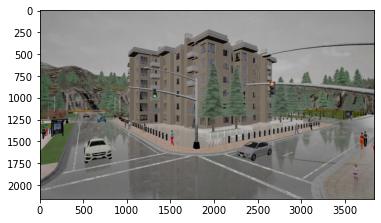

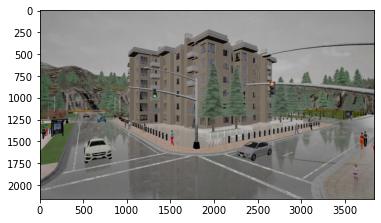

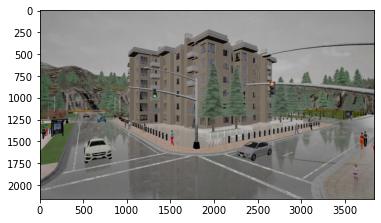

In [16]:
traffic_world.overlay_trajectory(cam1_id, returned_trajectory)

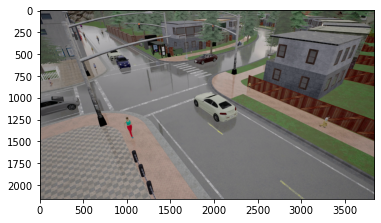

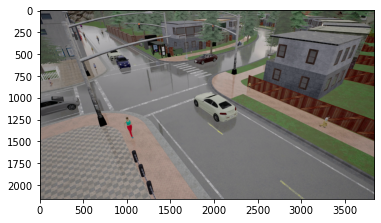

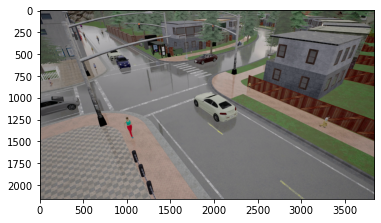

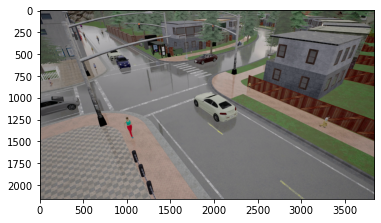

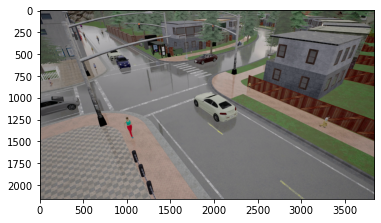

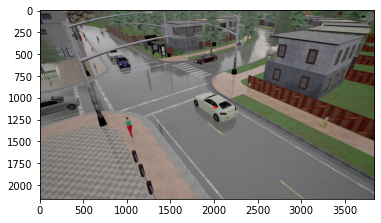

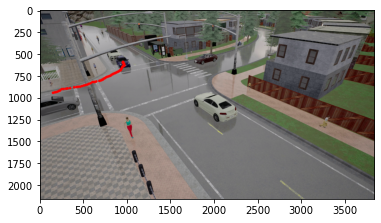

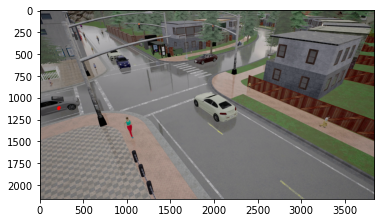

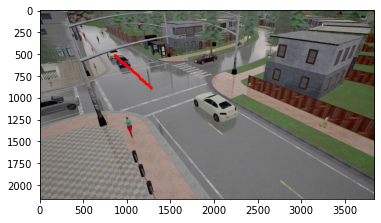

In [17]:
traffic_world.overlay_trajectory(cam2_id, returned_trajectory)